<a href="https://colab.research.google.com/github/Yisahak/Yisahak/blob/main/dataPreprocessing_GRU1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all necessary libraries.
import numpy as np
import pandas as pd
from sklearn  import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# Set seeds for reproduciability
np.random.seed(0)

# Read dataset

In [4]:
# Import Dataset

traffic_data = pd.read_csv("/content/MW_LOG_111.csv", parse_dates=['Date'], index_col='Date')

In [5]:
traffic_data.head()

,Fault_Type,Severity_id,RTN_id,OptiX RTN 905,OptiX RTN 980,OptiX RTN 950A,OptiX RTN 380A,OptiX RTN 380AX,year,month,week_day
Date,,,,,,,,,,,
2022-11-10 15:49:00,1,3,146,0,0,1,0,0,2022,11,3
2022-11-10 15:49:00,5,3,640,0,0,1,0,0,2022,11,3
2022-11-10 15:51:00,6,3,1349,0,0,1,0,0,2022,11,3
2022-11-10 15:52:00,2,1,688,1,0,0,0,0,2022,11,3
2022-11-10 15:53:00,1,3,19,0,0,1,0,0,2022,11,3


In [6]:
# Checking for any missing or empty value
traffic_data.isna().sum()

Fault_Type         0
Severity_id        0
RTN_id             0
OptiX RTN 905      0
OptiX RTN 980      0
OptiX RTN 950A     0
OptiX RTN 380A     0
OptiX RTN 380AX    0
year               0
month              0
week_day           0
dtype: int64

In [7]:
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 105697 entries, 2022-11-10 15:49:00 to 2023-03-31 23:49:00
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Fault_Type       105697 non-null  int64
 1   Severity_id      105697 non-null  int64
 2   RTN_id           105697 non-null  int64
 3   OptiX RTN 905    105697 non-null  int64
 4   OptiX RTN 980    105697 non-null  int64
 5   OptiX RTN 950A   105697 non-null  int64
 6   OptiX RTN 380A   105697 non-null  int64
 7   OptiX RTN 380AX  105697 non-null  int64
 8   year             105697 non-null  int64
 9   month            105697 non-null  int64
 10  week_day         105697 non-null  int64
dtypes: int64(11)
memory usage: 9.7 MB


In [8]:
traffic_data.describe()

,Fault_Type,Severity_id,RTN_id,OptiX RTN 905,OptiX RTN 980,OptiX RTN 950A,OptiX RTN 380A,OptiX RTN 380AX,year,month,week_day
count,105697.000000,105697.000000,105697.000000,105697.000000,105697.000000,105697.000000,105697.000000,105697.000000,105697.000000,105697.000000,105697.000000
mean,3.823874,2.365971,795.427467,0.428404,0.103040,0.467194,0.000927,0.000435,2022.952080,2.648032,4.059321
std,2.601605,0.839146,502.991391,0.494850,0.304012,0.498925,0.030436,0.020857,0.213598,2.112888,1.789597
min,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.000000,1.000000,1.000000
25%,2.000000,2.000000,241.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,2.000000,3.000000
50%,4.000000,3.000000,808.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.000000,2.000000,4.000000
75%,6.000000,3.000000,1269.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2023.000000,3.000000,6.000000
max,9.000000,3.000000,1656.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2023.000000,12.000000,7.000000


<Axes: xlabel='Date'>

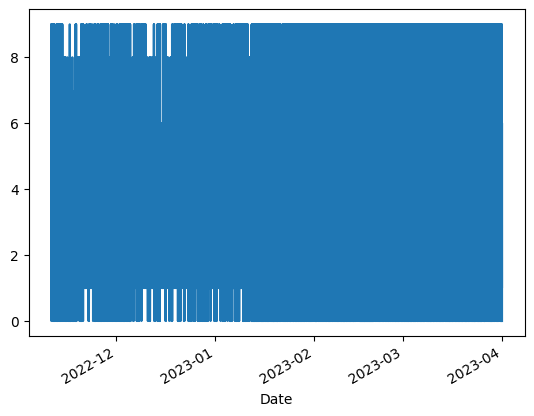

In [9]:
#traffic_data['temp'].plot()
traffic_data['Fault_Type'].plot()

<Axes: xlabel='Date'>

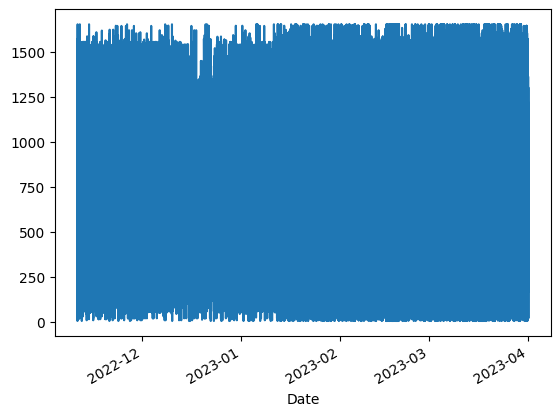

In [10]:
traffic_data['RTN_id'].plot()

In [11]:
# Values of the attribute are in different scales. For example, holiday has maximum value 1 and traffic volume let say, 2000. Since these values are totally different range, it might be hurt model learning process. To overcome this issue, we need to do data normalization or standarization.
sc = MinMaxScaler()
data_set = sc.fit_transform(traffic_data)
data_frame = pd.DataFrame(data_set)


In [14]:
# Make data for the LSTM model. I used past t-hours of data to predict the next 'n' hours data. Here window_size means window size data will be used for predicting next 'n' hours data

def df_to_x_y(data, window_size=5):
    X = []
    y = []
    for i in range(len(data)-window_size):
        row = [r for r in data[i:i+window_size]]
        X.append(row)
        label = data[i+window_size][7]
        y.append(label)
    return np.array(X), np.array(y)

X, y = df_to_x_y(data_set,72)
X.shape, y.shape

((105625, 72, 11), (105625,))

In [15]:
# split data into train test and validation datase
from cgi import test


train_length = int(len(X)*0.8) # 80% trainging
test_length = int(len(X)*.10) # 10% testing and rest for validation
print(train_length, test_length, (train_length+test_length))
X_train, y_train = X[:train_length],y[:train_length]
X_val, y_val = X[train_length:(train_length+test_length)], y[train_length:(train_length+test_length)]
X_test, y_test = X[(train_length+test_length):], y[(train_length+test_length):]

84500 10562 95062


In [16]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_val.shape, y_val.shape)


(((84500, 72, 11), (84500,)),
 ((10563, 72, 11), (10563,)),
 ((10562, 72, 11), (10562,)))

In [17]:
#define model:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.random.set_seed(0)
model = Sequential()
model.add(InputLayer((72,11)))
model.add(GRU(128, return_sequences=True))
model.add(GRU(64, return_sequences=True))
model.add(GRU(32, return_sequences=True))
model.add(GRU(16))
model.add(Dense(1,'linear'))


In [18]:
cp = ModelCheckpoint('model/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001))


In [19]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, callbacks=[cp], batch_size=128, verbose=1)

Epoch 1/5
661/661 [==============================] - ETA: 0s - loss: 6.6377e-04

661/661 [==============================] - 342s 503ms/step - loss: 6.6377e-04 - val_loss: 5.1947e-06
Epoch 2/5
661/661 [==============================] - ETA: 0s - loss: 5.4312e-04

661/661 [==============================] - 338s 511ms/step - loss: 5.4312e-04 - val_loss: 3.0683e-06
Epoch 3/5
661/661 [==============================] - 323s 489ms/step - loss: 5.5033e-04 - val_loss: 1.1709e-05
Epoch 4/5
661/661 [==============================] - 323s 489ms/step - loss: 5.4584e-04 - val_loss: 3.8436e-06
Epoch 5/5
661/661 [==============================] - ETA: 0s - loss: 5.4218e-04

661/661 [==============================] - 333s 503ms/step - loss: 5.4218e-04 - val_loss: 8.8231e-07


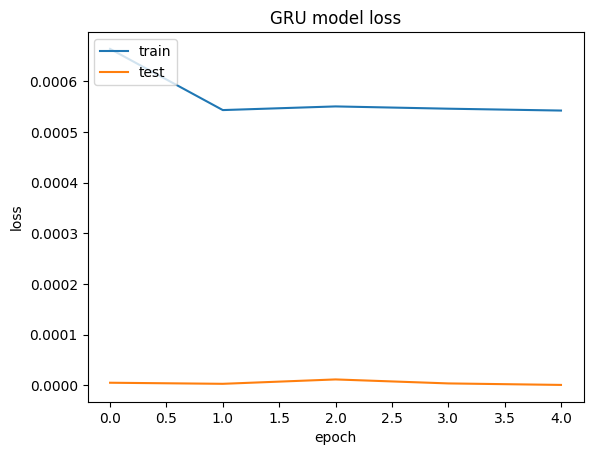

In [20]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('GRU model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
from tensorflow.keras.models import load_model
m = load_model('model/')

In [22]:
pre = m.predict(X_test)

331/331 [==============================] - 21s 59ms/step


In [23]:
from tabnanny import verbose


eva = m.evaluate(X_test, y_test, verbose=0)

In [24]:
eva

9.579120523994789e-05

In [25]:
Y = np.repeat(pre, 11, axis=1)
TT = sc.inverse_transform(Y)
TT 

array([[-6.4885896e-03,  9.9855810e-01,  2.8089833e+00, ...,
         2.0219993e+03,  9.9206954e-01,  9.9567425e-01],
       [-5.3840559e-03,  9.9880356e-01,  3.0117266e+00, ...,
         2.0219994e+03,  9.9341953e-01,  9.9641061e-01],
       [-4.9035382e-03,  9.9891031e-01,  3.0999284e+00, ...,
         2.0219995e+03,  9.9400681e-01,  9.9673092e-01],
       ...,
       [-7.4431878e-03,  9.9834597e-01,  2.6337616e+00, ...,
         2.0219991e+03,  9.9090278e-01,  9.9503785e-01],
       [-1.1597728e-02,  9.9742275e-01,  1.8711725e+00, ...,
         2.0219987e+03,  9.8582500e-01,  9.9226820e-01],
       [-1.1987319e-02,  9.9733615e-01,  1.7996609e+00, ...,
         2.0219987e+03,  9.8534882e-01,  9.9200845e-01]], dtype=float32)

In [26]:
Y_test = np.repeat(y_test, 11)
Y_test = Y_test.reshape(-1,11)
Y_TT = sc.inverse_transform(Y_test)
Y_TT

array([[0.000e+00, 1.000e+00, 4.000e+00, ..., 2.022e+03, 1.000e+00,
        1.000e+00],
       [0.000e+00, 1.000e+00, 4.000e+00, ..., 2.022e+03, 1.000e+00,
        1.000e+00],
       [0.000e+00, 1.000e+00, 4.000e+00, ..., 2.022e+03, 1.000e+00,
        1.000e+00],
       ...,
       [0.000e+00, 1.000e+00, 4.000e+00, ..., 2.022e+03, 1.000e+00,
        1.000e+00],
       [0.000e+00, 1.000e+00, 4.000e+00, ..., 2.022e+03, 1.000e+00,
        1.000e+00],
       [0.000e+00, 1.000e+00, 4.000e+00, ..., 2.022e+03, 1.000e+00,
        1.000e+00]])

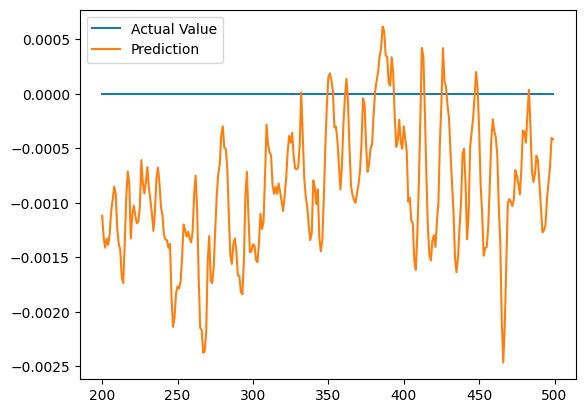

In [27]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:500], Y_test[200:500])
plt.plot(X[200:500], Y_pred[200:500])
plt.legend(['Actual Value','Prediction'])
plt.show()

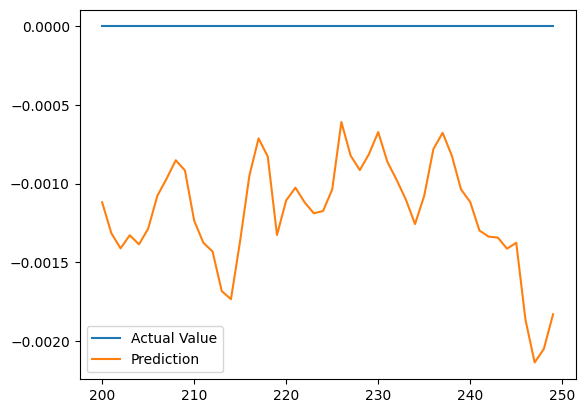

In [28]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:250], Y_test[200:250])
plt.plot(X[200:250], Y_pred[200:250])
plt.legend(['Actual Value','Prediction'])
plt.show()

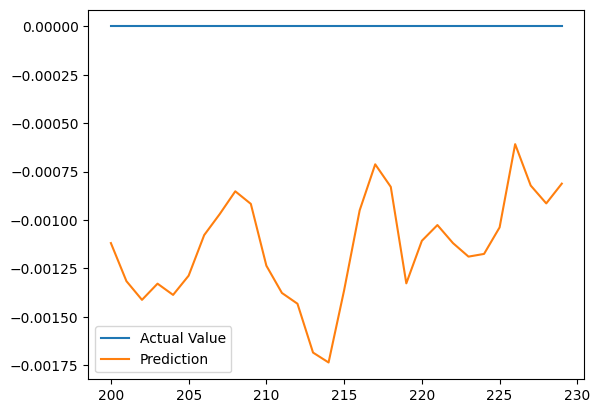

In [29]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[200:230], Y_test[200:230])
plt.plot(X[200:230], Y_pred[200:230])
plt.legend(['Actual Value','Prediction'])
plt.show()

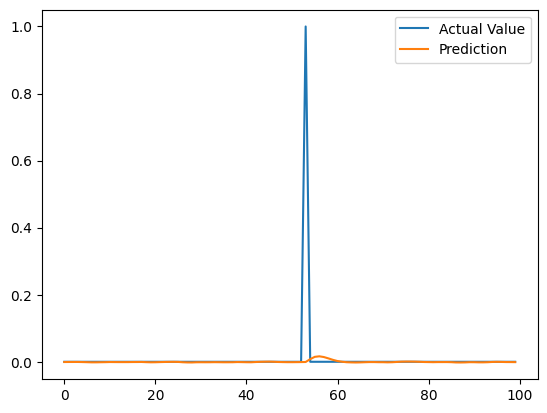

In [30]:
Y_pred = TT[:, 7]
Y_test = Y_TT[:, 7]

X =  [i for i in range(len(Y_TT))]
plt.plot(X[0:100], Y_test[0:100])
plt.plot(X[0:100], Y_pred[0:100])
plt.legend(['Actual Value','Prediction'])
plt.show()